In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_dataset = pd.read_csv("C:/Users/HP/Desktop/Twitter Sentiment Analysis/Dataset/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names=['sentiment', 'id', 'date', 'query', 'user', 'tweet'])

In [22]:
train_dataset
train_original=train_dataset.copy()
train_dataset = train_dataset.sample(n=500000)
train_dataset.sentiment.value_counts()

sentiment
4    250563
0    249437
Name: count, dtype: int64

In [23]:
dataset = train_dataset.drop(columns=['id', 'date', 'query', 'user'])
dataset

,sentiment,tweet
1062111,4,@Battleborne thank you so much Very sweet!
1499573,4,@KimKardashian I love you too Kim success!
210880,0,@RagingBitch @I100 - pretty epic FAIL today. E...
1546815,4,@cocodkr Thank you!!
1027478,4,@starvingbroker I am a realtor in Corona so he...
...,...,...
709275,0,Blog won't be updated for a little while. My c...
1349343,4,@kellycisco Glad you love your virtual job. M...
146364,0,@MirandaBuzz i luv icarly !!!!!!!1 but v dont ...
597502,0,went to bed. dozed off. woke up from panic att...


In [24]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [25]:
import re
import string

STOPWORDS = set(stopwordlist)
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def clean_text(text):
    # Remove stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # Remove punctuations
    translator = str.maketrans('', '', punctuations_list)
    text = text.translate(translator)
    
    # Remove repeating characters
    text = re.sub(r'(.)\1+', r'\1', text)
    
    # Remove URLs
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    return text

# Apply the combined function to the dataset
dataset['tweet'] = dataset['tweet'].apply(clean_text)
dataset['tweet'].head()


1062111                      Batleborne thank much Very swet
1499573                       KimKardashian I love Kim suces
210880     RagingBitch I prety epic FAIL today Even Blip ...
1546815                                    cocodkr Thank you
1027478    starvingbroker I realtor Corona helo nearby ne...
Name: tweet, dtype: object

In [26]:
dataset['tweet']=dataset['tweet'].str.lower()

In [27]:
# nltk
from nltk.stem import WordNetLemmatizer

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].tail()

709275     [blog, wont, updated, litle, while, my, compy,...
1349343        [kelycisco, glad, love, virtual, job, me, to]
146364     [mirandabuz, luv, icarly, but, v, dont, get, i...
597502     [went, bed, dozed, of, woke, panic, atack, thi...
539486                       [omg, id, rather, schol, break]
Name: tweet, dtype: object

In [29]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].head()

1062111                [batleborne, thank, much, very, swet]
1499573                 [kimkardashian, i, love, kim, suces]
210880     [ragingbitch, i, prety, epic, fail, today, eve...
1546815                                [cocodkr, thank, you]
1027478    [starvingbroker, i, realtor, corona, helo, nea...
Name: tweet, dtype: object

In [30]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' '.join(text)

dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

1062111                      batleborne thank much very swet
1499573                       kimkardashian i love kim suces
210880     ragingbitch i prety epic fail today even blip ...
1546815                                    cocodkr thank you
1027478    starvingbroker i realtor corona helo nearby ne...
Name: tweet, dtype: object

In [31]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [32]:
all_words_positive = ' '.join(text for text in dataset['tweet'][dataset['sentiment']==4])

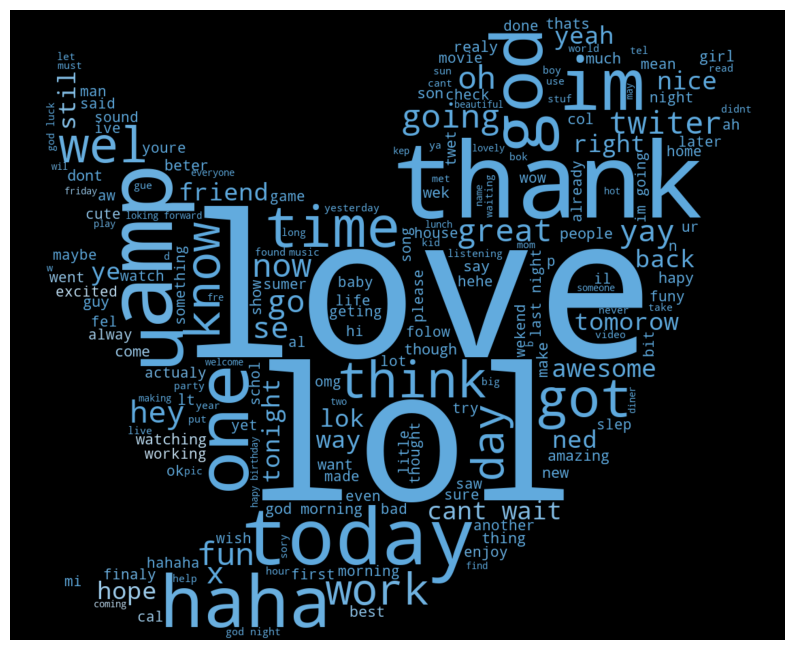

In [33]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [34]:
all_words_negative = ' '.join(text for text in dataset['tweet'][dataset['sentiment']==0])

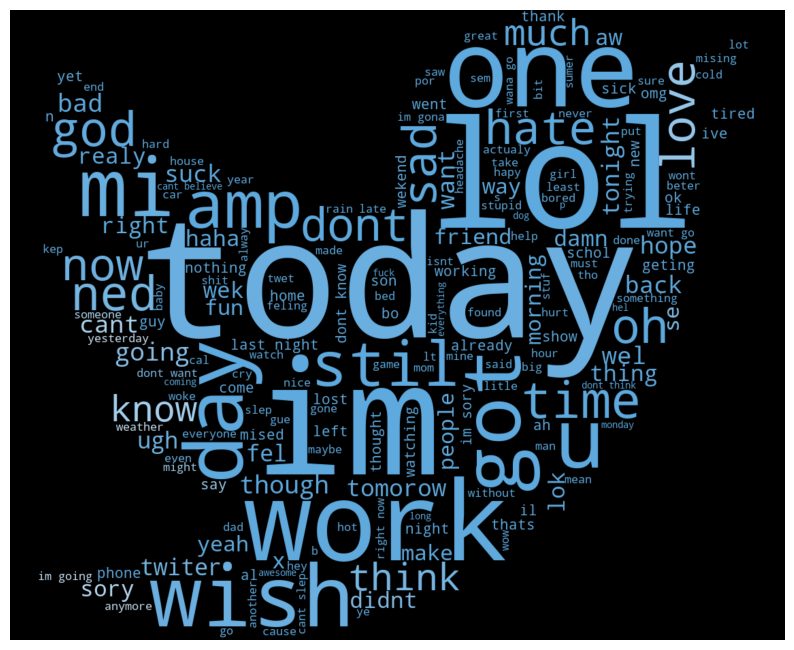

In [35]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [40]:
X=dataset.tweet
y=dataset.sentiment

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =26105111)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  1621327


In [43]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [44]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    print("Accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     74915
           4       0.79      0.78      0.79     75085

    accuracy                           0.79    150000
   macro avg       0.79      0.79      0.79    150000
weighted avg       0.79      0.79      0.79    150000

Accuracy score:  0.7885133333333333


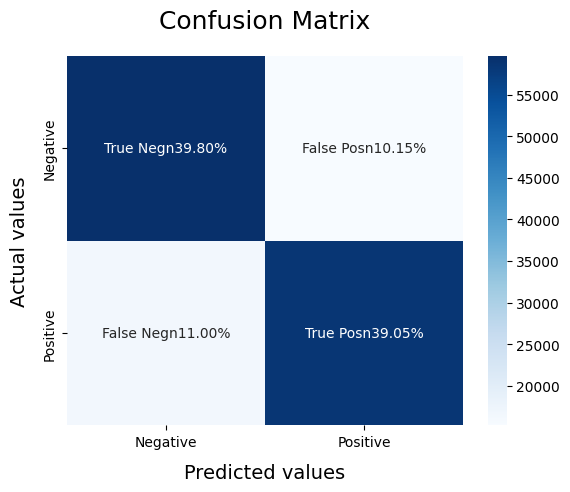

In [45]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

c:\Users\HP\Desktop\Twitter Sentiment Analysis\.venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.81      0.80     74915
           4       0.81      0.79      0.80     75085

    accuracy                           0.80    150000
   macro avg       0.80      0.80      0.80    150000
weighted avg       0.80      0.80      0.80    150000

Accuracy score:  0.8013133333333333


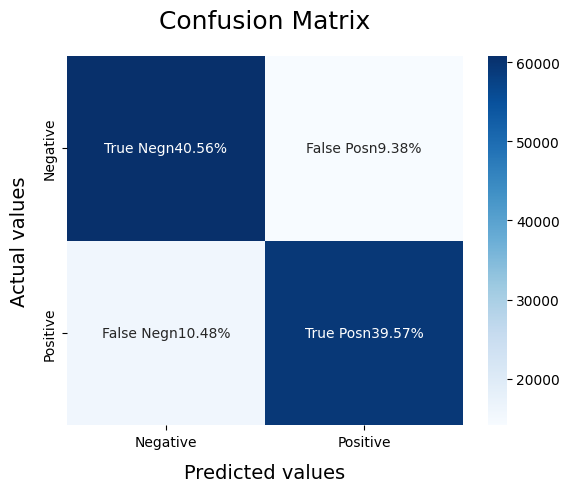

In [46]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     74915
           4       0.81      0.80      0.80     75085

    accuracy                           0.80    150000
   macro avg       0.80      0.80      0.80    150000
weighted avg       0.80      0.80      0.80    150000

Accuracy score:  0.8045733333333334


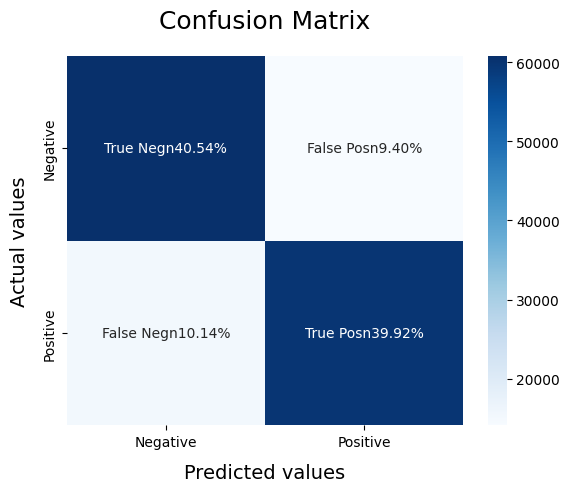

In [47]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)